In [1]:
import pandas as pd

# Nation's report card

Standardized test scores by state, student subgroup, released every couple of years by NAEP

In [136]:
def get_sheet(subject, student_subgroup, grade):
    
    if subject.lower().strip() == "math":
        fname = "data/2017_Results_Appendix_Math_State.xlsx"
    elif subject.lower().strip() == "reading":
        fname = "data/2017_Results_Appendix_Reading_State.xlsx"
    else:
        raise Exception("Invalid subject '" + subject + "'")
    
    if grade not in [4, 8]:
        raise Exception("Invalid grade: " + str(grade))
    
    if student_subgroup == "frpl":
        sheetnames = ["SchoolLunch_G" + str(grade)]
    if student_subgroup == "ell":
        sheetnames = ["ELL_G" + str(grade)]
        if grade == 4:
            sheetnames = [11]
    if student_subgroup == "disabilities":
        sheetnames = ["SD_G" + str(grade)]
    elif student_subgroup == "race":
        sheetnames = [
            "RaceEthnicity_G" + str(grade),
            "RaceEthnicity_G" + str(grade) + "(cont.)"
            #"NEWRace_G" + str(grade)
        ]
        
    frame = None

    for sheetname in sheetnames:
        new_frame = pd.read_excel(
            fname, 
            sheetname=sheetname,
            skiprows=7,
        )
        
        new_frame = new_frame.set_index(new_frame.columns[0]).convert_objects(convert_numeric=True)
        if frame is None:
            frame = new_frame
        else:
            frame = frame.join(new_frame, rsuffix="_r")
            
    frame = frame.reset_index()
            
    # All I want is average scores. I can drop the columns where the header is empty

    categories = []
    for c in frame.columns:
        if c.startswith("Unnamed:"): continue
        categories.append(c)
        
    if subject == "math":
        keepers = ["Unnamed: 0"] + categories
    else:
        keepers = categories
            
    ret = frame[keepers]
    
    ret = ret.drop([0,1]).dropna(
        subset=categories,
        how="all"
    )
    
    
    for c in keepers[1:]:
        if c.endswith("_r"): 
            ret[c] = None
            continue
        ret[c] = pd.to_numeric(ret[c],errors="coerce")
    
    keepers[0] = "state"
    ret.columns = keepers
    
    return ret

#get_sheet("math","race",8)
#get_sheet("reading","race",8)
#get_sheet("reading","ell",4)
#get_sheet("reading","disabilities",8)
#get_sheet("reading","race",4)
get_sheet("math","frpl",4)

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,state,Eligible,Not eligible,Information not available
2,Nation,228.005049,252.418509,246.908999
3,Nation (public),228.042096,252.650880,238.375846
4,Alabama,224.776022,247.248783,NaN
5,Alaska,218.728109,242.082480,NaN
6,Arizona,224.214264,250.672344,250.449673
7,Arkansas,226.625415,247.625031,NaN
8,California,221.479751,250.458031,232.909612
9,Colorado,226.333067,252.125764,244.727267
10,Connecticut,224.420695,249.455275,NaN
11,Delaware,224.788193,245.485281,NaN


In [137]:
def lower_cols(df):
    ret = df.copy()
    cols = ret.columns
    lower_cols = []
    for c in cols:
        lower_cols.append(c.lower().strip())
    ret.columns = lower_cols
    
    
    return ret
    

In [138]:
lower_cols(get_sheet("math","race",8)).head()

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,state,white,black,hispanic,asian/pacific islander,american indian/alaska native
2,Nation,292.646075,260.386363,269.019034,309.528848,267.443650
3,Nation (public),292.164707,259.603785,268.492951,309.522764,268.243961
4,Alabama,277.349254,251.557411,256.714228,NaN,NaN
5,Alaska,290.611768,254.766202,273.491624,274.274972,253.103372
6,Arizona,296.380355,272.277282,269.162319,315.509916,262.835386


In [139]:
# Make CSV files for each category

def make_csv(subject, subgroup, grade):
    
    df = get_sheet(subject, subgroup, grade)
    
    # Add 

In [140]:
def state(statestr):
    
    try:
        return us.states.lookup(unicode(statestr))
    except:
        return

print state("Connecticut").ap_abbr
print state("Connecticut").abbr
help(state("Connecticut"))

Conn.
CT
Help on State in module us.states object:

class State(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |  
 |  __repr__(self)
 |  
 |  __str__(self)
 |  
 |  shapefile_urls(self, region=None)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [141]:
import us
def add_states(df,state_col="state"):
    
    # Add state abbreviation columns
    ap_abbrs = []
    postals = []
    
    for i, row in df.iterrows():
        
        st = state(row[state_col])
        ap = None
        p = None
        if st is not None:
            ap = st.ap_abbr
            p = st.abbr
            
        if row[state_col] in ["Nation"]:
            ap = "U.S."
            p = "US"
            
        ap_abbrs.append(ap)
        postals.append(p)
    
    ret = df.copy()
    ret["postal"] = postals
    ret["ap_abbr"] = ap_abbrs
    
    return ret
    
add_states(lower_cols(get_sheet("math","race",8)).head())
    
    

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,state,white,black,hispanic,asian/pacific islander,american indian/alaska native,postal,ap_abbr
2,Nation,292.646075,260.386363,269.019034,309.528848,267.443650,US,U.S.
3,Nation (public),292.164707,259.603785,268.492951,309.522764,268.243961,None,None
4,Alabama,277.349254,251.557411,256.714228,NaN,NaN,AL,Ala.
5,Alaska,290.611768,254.766202,273.491624,274.274972,253.103372,AK,Alaska
6,Arizona,296.380355,272.277282,269.162319,315.509916,262.835386,AZ,Ariz.


In [142]:
clean_and_nice("reading","race",4)

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,state,white,black,hispanic,asian/pacific islander,american indian/alaska native,postal,ap_abbr
2,Arizona,231.534562,205.517037,204.244812,240.348033,186.356781,AZ,Ariz.
3,Arkansas,223.542743,198.254830,210.392930,207.718949,NaN,AR,Ark.
4,California,231.359001,198.692721,204.240300,242.152783,NaN,CA,Calif.
5,Colorado,235.405083,206.314381,209.278876,236.105685,NaN,CO,Colo.
6,Connecticut,237.815506,209.524479,213.021805,248.179691,NaN,CT,Conn.
7,Delaware,232.619480,209.387655,209.268548,249.895219,NaN,DE,Del.
8,District of Columbia,256.265815,206.795405,204.447693,NaN,NaN,DC,D.C.
9,DoDEA1,239.631306,226.044635,229.144645,232.861227,NaN,None,None
10,Florida,238.500972,212.366361,224.933756,249.119987,NaN,FL,Fla.
11,Georgia,230.771208,206.262401,213.548534,247.539153,NaN,GA,Ga.


In [143]:
import os

def make_csvs(year="2017"):
    for subject in ["math","reading"]:
        for grade in [4,8]:
            frames = None
            for subgroup in ["frpl","race","ell","disabilities"]:
                    fname = "_".join([subgroup, subject, str(grade)]) + ".csv"
                    print(fname)
                    df = add_states(lower_cols(get_sheet(subject,subgroup,grade)))
                    df = df[df["ap_abbr"].notnull()]
                    fname = "_".join([subgroup, subject, str(grade)]) + ".csv"
                    df.to_csv(os.path.join("viz","data",fname), index=False, encoding="utf-8")
                    if frames is None:
                        frames = df.set_index("state")
                    frames = frames.join(df.set_index("state"),rsuffix="_drop")
            keepers = []
            for c in frames.columns:
                if c.endswith("_drop"): continue
                keepers.append(c)
            frames[keepers].to_csv("csv/combined_" + subject + "_" + str(grade) + ".csv")
        
make_csvs()

frpl_math_4.csv


/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


race_math_4.csv
ell_math_4.csv
disabilities_math_4.csv
frpl_math_8.csv
race_math_8.csv
ell_math_8.csv
disabilities_math_8.csv
frpl_reading_4.csv
race_reading_4.csv
ell_reading_4.csv
disabilities_reading_4.csv
frpl_reading_8.csv
race_reading_8.csv
ell_reading_8.csv
disabilities_reading_8.csv


## Make "gap" tables 

In [144]:
def gap_series(df, col1, col2):
    return df[col1] - df[col2]

In [145]:
def clean_and_nice(subject, subgroup, grade):
    return add_states(lower_cols(get_sheet(subject,subgroup,grade)))

In [146]:
frpl_math_8 = clean_and_nice("math","frpl",8)
frpl_math_8.head()

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,state,eligible,not eligible,information not available,postal,ap_abbr
2,Nation,266.952675,296.345339,295.775224,US,U.S.
3,Nation (public),266.885732,296.558942,292.939011,None,None
4,Alabama,257.564726,285.930535,NaN,AL,Ala.
5,Alaska,261.513993,290.549182,NaN,AK,Alaska
6,Arizona,269.595343,293.048748,308.994568,AZ,Ariz.


In [147]:
gap_series(clean_and_nice("math","frpl",8),
           "eligible", "not eligible").head()

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


2   -29.392663
3   -29.673210
4   -28.365809
5   -29.035189
6   -23.453405
dtype: float64

In [148]:
import matplotlib

%matplotlib inline
# matplotlib.style.use('ggplot')
matplotlib.style.use('mirror00')
import matplotlib.pyplot as plt

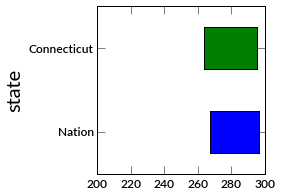

In [149]:
def gap_chart(df, col1, col2):
    
    tmp_df = df.set_index("state")
    tmp_df = tmp_df[tmp_df.index.map(lambda x: x in ["Connecticut","Nation"]) ]
    rights = tmp_df.copy()[col2] - tmp_df.copy()[col1]
    lefts = tmp_df.copy()[col1] 
    plt.xlim(xmin=200,xmax=300)

    return rights.plot.barh(left=lefts)

gap_chart(frpl_math_8, "not eligible","eligible")